<a href="https://colab.research.google.com/github/waliapriya/Deep-Neural-Network/blob/main/Multi_Layer_Perceptron_Model_CIFAR10_small_images_classification_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Neural Network Multi Layer Perceptron Model with Image Processing on CIFAR10 dataset

#### Artificial Neural Network
- The term "Artificial Neural Network" is derived from Biological neural networks that develop the structure of a human brain. Similar to the human brain that has neurons interconnected to one another, artificial neural networks also have neurons that are interconnected to one another in various layers of the networks. These neurons are known as nodes.

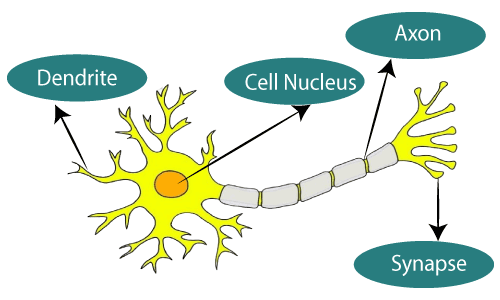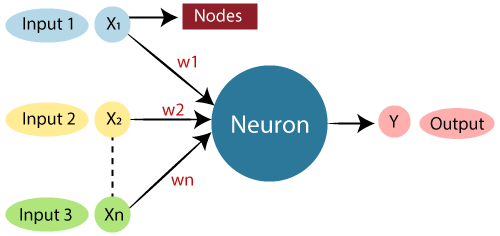

- Dendrites from Biological Neural Network represent inputs in Artificial Neural Networks, cell nucleus represents Nodes, synapse represents Weights, and Axon represents Output

#### Deep Neural Network
- A deep neural network (DNN) is an ANN with multiple hidden layers between the input and output layers.

#### Multi-layer Perceptron
- Multi-layer perception is also known as MLP. It is fully connected dense layers, which transform any input dimension to the desired dimension. A multi-layer perception is a neural network that has multiple layers.
- A multi-layer perceptron has one input layer and for each input, there is one neuron(or node), it has one output layer with a single node for each output and it can have any number of hidden layers and each hidden layer can have any number of nodes.

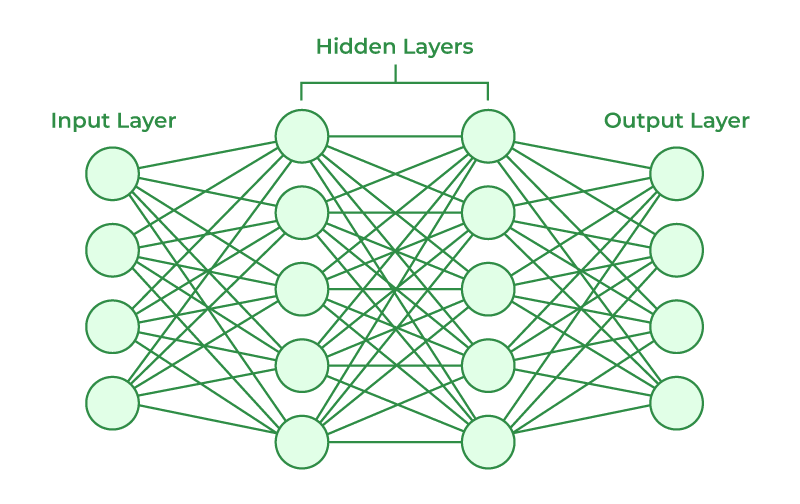

#### Objective
- The objective is to process image and build Multi Perceptron Model.

#### Dataset source & brief
- The dataset has been sourced from keras and it is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.

#### Import the basic libraries

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


#### Import Deep Learning libraries

In [81]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense, BatchNormalization, Dropout
from keras import Sequential
from keras.layers import Flatten

#### Load the dataset

In [82]:
df=keras.datasets.cifar10
df

<module 'keras.api._v2.keras.datasets.cifar10' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/cifar10/__init__.py'>

#### Splitting data into Train & test

In [83]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [84]:
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


#### Data Preprocessing

##### 1.  Normalization by Min Max approach

In [85]:
x_train=x_train/255.0
x_test=x_test/255.0

##### 2. Encoding

In [86]:
y_train  = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#### Data visualization

- Random image visualization

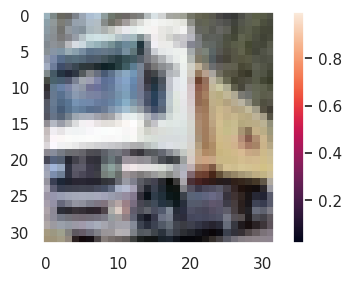

In [87]:
plt.figure(figsize=(5,3))
plt.imshow(x_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

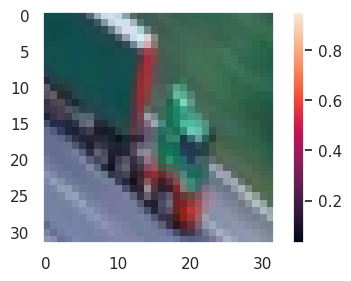

In [138]:
plt.figure(figsize=(5,3))
plt.imshow(x_train[50])
plt.colorbar()
plt.grid(False)
plt.show()

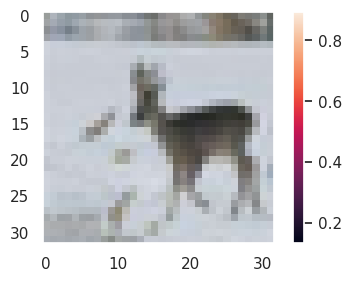

In [139]:
plt.figure(figsize=(5,3))
plt.imshow(x_train[20])
plt.colorbar()
plt.grid(False)
plt.show()

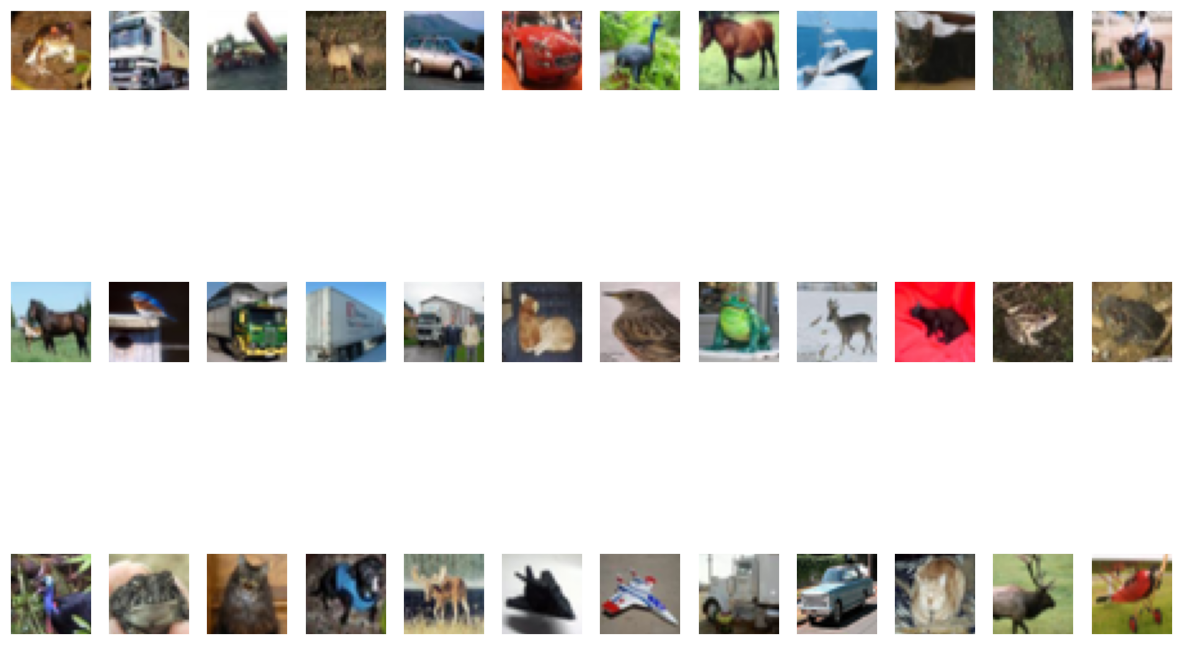

In [140]:
def plot_images(x_train):
    fig = plt.figure(figsize=(15,10))
    for i in range(36):
        ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
        ax.imshow(np.squeeze(x_train[i]))
plot_images(x_train)


#### Model No. 1 - Base model without any Hyperparameters

#### 1. Modelling

In [91]:
model=keras.Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

##### Explanation
- The sequential model allows us to specify a neural network, precisely, sequential: from input to output, passing through a series of neural layers, one after the other.
-  Flatten converts the multi-dimensional arrays into flattened one-dimensional arrays or single-dimensional arrays. It takes all the elements in the original tensor (multi-dimensional array) and puts them into a single-dimensional array.
-The activation function decides whether a neuron should be activated or not by calculating the weighted sum and further adding bias to it.
- 1. A rectified linear unit (ReLU) is an activation function that introduces the property of non-linearity to a deep learning model and solves the vanishing gradients issue.
- 2.  The softmax function converts a vector of real numbers into a probability distribution for multiclass classification tasks, ensuring that the sum of the probabilities is equal to one.
- A dense layer puts numerous perceptrons into one layer. All neurons of successive layers are connected to each other, i.e., are densly connected.
- 1. The first dense layer is used to make a fully connected model and is the hidden layer.
- 2. The second dense layer is the output layer which contains 10 neurons that decide which category the image belongs to.

#### 2. Compile the model

In [92]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

##### Explanation
- The purpose of loss functions is to compute the quantity that a model should seek to minimize during training.
- Optimizers are Classes or methods used to change the attributes of your machine/deep learning model such as weights and learning rate in order to reduce the losses.
- A metric is a function that is used to judge the performance of your model.

#### 3. Model summary

In [93]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 3072)              0         
                                                                 
 dense_12 (Dense)            (None, 128)               393344    
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 4. Fit the model

In [94]:
history=model.fit(x_train, y_train,validation_data=(x_test, y_test),batch_size=32, epochs=100)

Epoch 1/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9058 - accuracy: 0.3132 - val_loss: 1.8138 - val_accuracy: 0.3597
Epoch 2/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7513 - accuracy: 0.3739 - val_loss: 1.7450 - val_accuracy: 0.3728
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6893 - accuracy: 0.3972 - val_loss: 1.6641 - val_accuracy: 0.4087
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6552 - accuracy: 0.4057 - val_loss: 1.6408 - val_accuracy: 0.4116
Epoch 5/100
1563/1563 [==============================] - 5s 4ms/step - loss: 1.6298 - accuracy: 0.4188 - val_loss: 1.6171 - val_accuracy: 0.4290
Epoch 6/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6162 - accuracy: 0.4204 - val_loss: 1.6024 - val_accuracy: 0.4280
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6021 - accuracy: 0.4303 - val_loss: 1.6153 - val_ac

##### Explanation
- Epochs tell us the number of times the model will be trained in back and forward passes. In short it means number of iterations.
- TensorBoard is a tool for providing the measurements and visualizations needed during the machine learning workflow. It enables tracking experiment metrics like loss and accuracy, visualizing the model graph, projecting embeddings to a lower dimensional space, and much more.

#### 5. Check the model's accuracy

In [95]:
accuracy_test = model.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(accuracy_test[1]))

313/313 [==============================] - 1s 3ms/step - loss: 1.5903 - accuracy: 0.4490
Test Accuracy: 0.4490000009536743


In [96]:
accuracy_train = model.evaluate(x_train, y_train)
print('Train Accuracy: {}'.format(accuracy_train[1]))

1563/1563 [==============================] - 4s 2ms/step - loss: 1.3655 - accuracy: 0.5122
Train Accuracy: 0.512220025062561


#### Accuracy Visualization

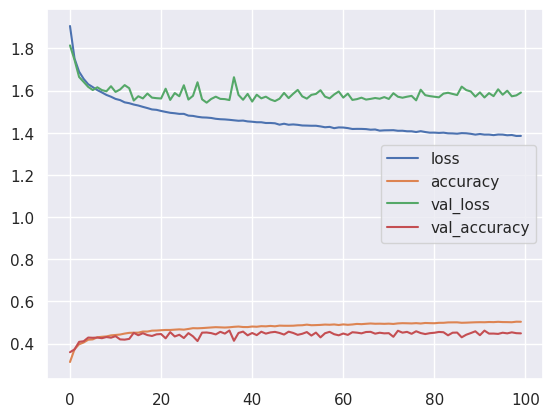

In [97]:
pd.DataFrame(history.history).plot()
plt.show()

#### Model No. 2- MLP with Dropout

In [98]:
model2=keras.Sequential()
model2.add(Flatten(input_shape=(32,32,3)))
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

##### Explanation
- Dropout is one of the important concept in the machine learning. It is used to fix the over-fitting issue. Input data may have some of the unwanted data, usually called as Noise. Dropout will try to remove the noise data and thus prevent the model from over-fitting.

In [99]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [100]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 3072)              0         
                                                                 
 dense_14 (Dense)            (None, 128)               393344    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [101]:
history2=model2.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=20)

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 2.2150 - accuracy: 0.1348 - val_loss: 2.1206 - val_accuracy: 0.1836
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1883 - accuracy: 0.1426 - val_loss: 2.1098 - val_accuracy: 0.1938
Epoch 3/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1814 - accuracy: 0.1422 - val_loss: 2.0963 - val_accuracy: 0.1895
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1801 - accuracy: 0.1410 - val_loss: 2.0793 - val_accuracy: 0.1838
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1757 - accuracy: 0.1443 - val_loss: 2.0964 - val_accuracy: 0.1889
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1774 - accuracy: 0.1446 - val_loss: 2.0662 - val_accuracy: 0.1914
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1756 - accuracy: 0.1451 - val_loss: 2.0875 - val_accuracy:

In [102]:
accuracy_test2 = model2.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(accuracy_test2[1]))
accuracy_train2 = model2.evaluate(x_train, y_train)
print('Train Accuracy: {}'.format(accuracy_train2[1]))

313/313 [==============================] - 1s 2ms/step - loss: 2.0923 - accuracy: 0.1972
Test Accuracy: 0.1972000002861023
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0894 - accuracy: 0.1961
Train Accuracy: 0.19614000618457794


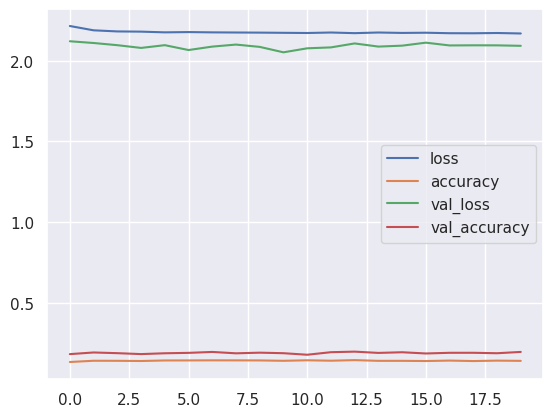

In [103]:
pd.DataFrame(history2.history).plot()
plt.show()

#### Model No. 3 - Adding Initializer

In [104]:
model3=keras.Sequential()
model3.add(Flatten(input_shape=(32,32,3)))
model3.add(Dense(128, activation='relu',kernel_initializer='he_normal'))
model3.add(Dropout(0.5))
model3.add(Dense(10, activation='softmax'))

##### Explanation
- Initializers define the way to set the initial random weights of Keras layers.

In [105]:
model3.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [106]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 3072)              0         
                                                                 
 dense_16 (Dense)            (None, 128)               393344    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [107]:
history3=model3.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=20)

Epoch 1/20
1563/1563 [==============================] - 7s 4ms/step - loss: 2.2057 - accuracy: 0.1342 - val_loss: 2.0912 - val_accuracy: 0.1749
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1862 - accuracy: 0.1401 - val_loss: 2.0939 - val_accuracy: 0.1865
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1833 - accuracy: 0.1437 - val_loss: 2.1146 - val_accuracy: 0.1850
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1789 - accuracy: 0.1435 - val_loss: 2.0928 - val_accuracy: 0.1857
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.1800 - accuracy: 0.1442 - val_loss: 2.0716 - val_accuracy: 0.1927
Epoch 6/20
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1638 - accuracy: 0.1553 - val_loss: 2.0592 - val_accuracy: 0.2198
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.1394 - accuracy: 0.1672 - val_loss: 2.0110 - val_accuracy:

In [108]:
accuracy_test3 = model3.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(accuracy_test3[1]))
accuracy_train3 = model3.evaluate(x_train, y_train)
print('Train Accuracy: {}'.format(accuracy_train3[1]))

313/313 [==============================] - 1s 2ms/step - loss: 1.9998 - accuracy: 0.2481
Test Accuracy: 0.24809999763965607
1563/1563 [==============================] - 4s 3ms/step - loss: 1.9960 - accuracy: 0.2548
Train Accuracy: 0.2547599971294403


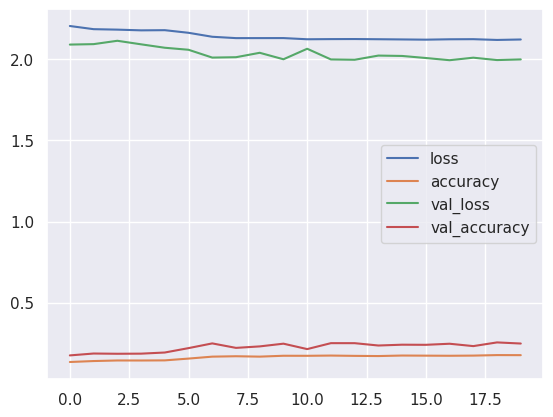

In [109]:
pd.DataFrame(history3.history).plot()
plt.show()

#### Model No 4 - Adding Ridge regularizer

In [110]:
model4=keras.Sequential()
model4.add(Flatten(input_shape=(32,32,3)))
model4.add(Dense(128, activation='relu',kernel_regularizer=keras.regularizers.l2(0.01)))
model4.add(Dropout(0.5))
model4.add(Dense(10, activation='softmax'))

##### Explanation
- Regularizers allow you to apply penalties on layer parameters or layer activity during optimization. These penalties are summed into the loss function that the network optimizes.

In [111]:
model4.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [112]:
model4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 3072)              0         
                                                                 
 dense_18 (Dense)            (None, 128)               393344    
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 10)                1290      
                                                                 
Total params: 394634 (1.51 MB)
Trainable params: 394634 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [121]:
history4=model3.fit(x_train, y_train,validation_data=(x_test, y_test),epochs=20)

Epoch 1/20
1563/1563 [==============================] - 7s 5ms/step - loss: 2.0809 - accuracy: 0.1975 - val_loss: 1.9708 - val_accuracy: 0.2720
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 2.0831 - accuracy: 0.1976 - val_loss: 1.9688 - val_accuracy: 0.2752
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0784 - accuracy: 0.2000 - val_loss: 1.9584 - val_accuracy: 0.2761
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0806 - accuracy: 0.1975 - val_loss: 1.9689 - val_accuracy: 0.2724
Epoch 5/20
1563/1563 [==============================] - 7s 4ms/step - loss: 2.0759 - accuracy: 0.1998 - val_loss: 1.9658 - val_accuracy: 0.2681
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 2.0790 - accuracy: 0.2027 - val_loss: 1.9422 - val_accuracy: 0.2815
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 2.0784 - accuracy: 0.1988 - val_loss: 1.9601 - val_accuracy:

In [122]:
accuracy_test4 = model4.evaluate(x_test, y_test)
print('Test Accuracy: {}'.format(accuracy_test4[1]))
accuracy_train4 = model4.evaluate(x_train, y_train)
print('Train Accuracy: {}'.format(accuracy_train4[1]))

313/313 [==============================] - 1s 2ms/step - loss: 4.9829 - accuracy: 0.0951
Test Accuracy: 0.09510000050067902
1563/1563 [==============================] - 5s 3ms/step - loss: 4.9835 - accuracy: 0.0956
Train Accuracy: 0.0955599993467331


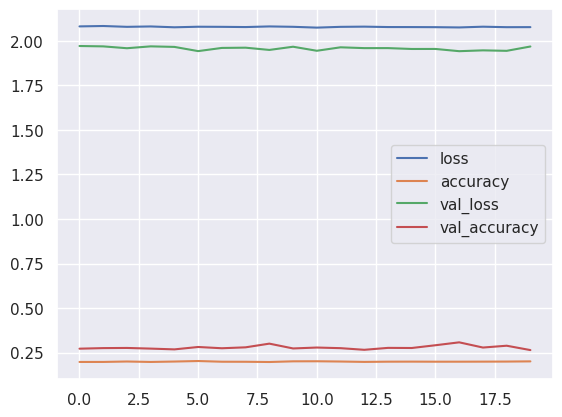

In [123]:
pd.DataFrame(history4.history).plot()
plt.show()

#### Accuracy of different models in tabular form

In [134]:
Models=['Base Model','MLP with Dropout','MLP with Initializer','MLP with Regularizer']
Trainacc=[accuracy_train[1],accuracy_train2[1],accuracy_train3[1],accuracy_train4[1]]
Testacc=[accuracy_test[1],accuracy_test2[1],accuracy_test3[1],accuracy_test4[1]]

In [135]:
Modelwise_accuracy=pd.DataFrame({'Model name':Models,'Train Accuracy':Trainacc,
                                'Test Accuracy':Testacc})
print(Modelwise_accuracy)

             Model name  Train Accuracy  Test Accuracy
0            Base Model         0.51222         0.4490
1      MLP with Dropout         0.19614         0.1972
2  MLP with Initializer         0.25476         0.2481
3  MLP with Regularizer         0.09556         0.0951


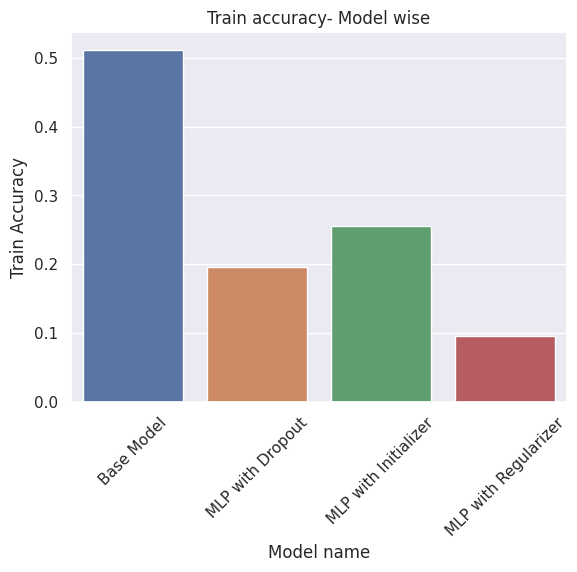

In [136]:
sns.barplot(x='Model name',y='Train Accuracy',data=Modelwise_accuracy)
plt.xticks(rotation=45)
plt.title('Train accuracy- Model wise')
plt.show()

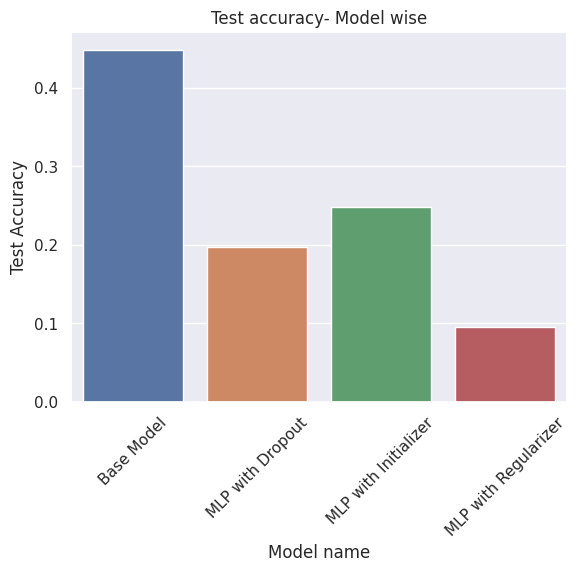

In [137]:
sns.barplot(x='Model name',y='Test Accuracy',data=Modelwise_accuracy)
plt.xticks(rotation=45)
plt.title('Test accuracy- Model wise')
plt.show()

#### Conclusion
- In this project, I tried to Multilayer Perceptron (MLP) neural network using Tensorflow and the Keras library.
- I tried to build 4 models - one basic model and other three with different Hyperparameters.
- The first step of basic MLP model building was defining the model's architecture by the use of Sequential model.
- In the second step I compiled the by specifying the loss function, optimizer, and evaluation metric.
- The third step was to train the model followed by evaluation.
- Hyperparameters were added in the second model and all the steps were repeated
- Concluding the samewe can say that Accuracy was very low with basic model as well as with the models having hyperparameters.
- After every step explanation is given for better understanding.
